# Universidade de Fortaleza
## Mestrado em Informática Aplicada
### Ciência de Dados aplicada à Ciência da Cidade

# Site Percolation: Theory and Urban Applications

## Introduction

Site percolation is a fundamental concept in statistical physics that has important applications in urban science. In site percolation:

- We have a lattice of **sites** (nodes)
- Each site is randomly **occupied** with probability **p** or **empty** with probability **(1-p)**
- We study cluster formation and connectivity as p varies

### Urban Applications

1. **Urban Development**: When does scattered development become continuous urban fabric?
2. **Service Coverage**: What density of facilities creates citywide access?
3. **Green Space Connectivity**: Are parks and green spaces connected or fragmented?
4. **Population Distribution**: Continuous vs. fragmented settlement patterns

### Key Concept: Percolation Threshold

The **percolation threshold** (p_c) is the critical occupation probability where:
- Below p_c: Only small, isolated clusters exist
- At p_c: A phase transition occurs - a giant connected cluster emerges
- Above p_c: A spanning cluster connects across the entire system

For a 2D square lattice: **p_c ≈ 0.593**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from collections import deque
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Basic Site Percolation

Let's create a simple site percolation model on a 2D square lattice.

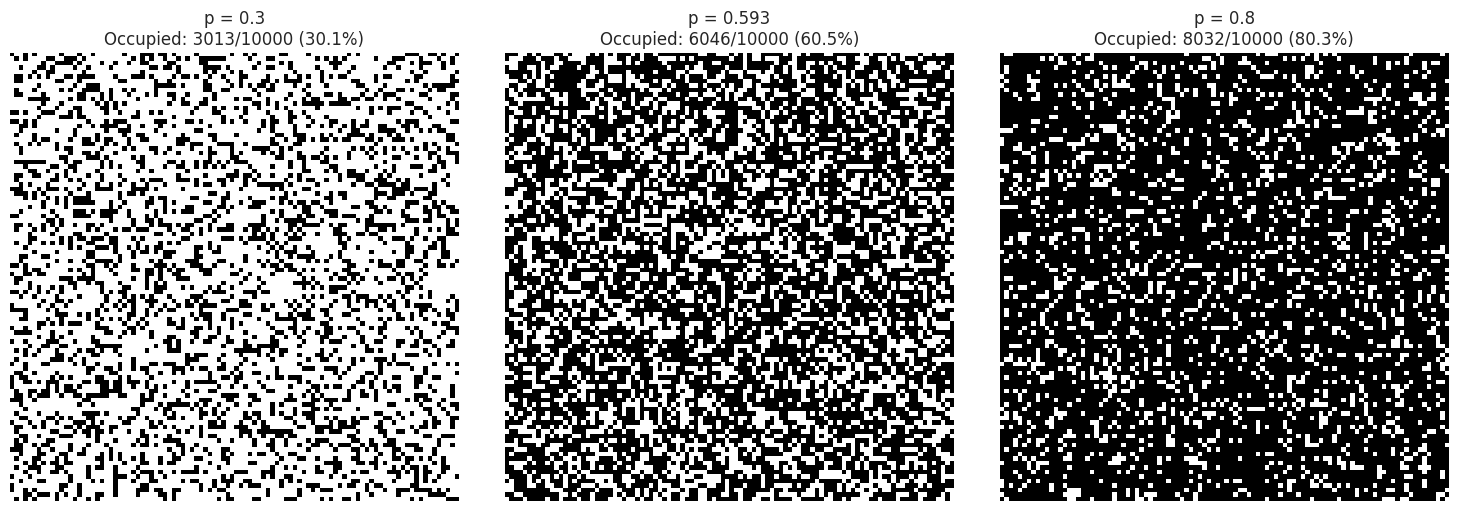

In [4]:
def create_lattice(size, p):
    """
    Create a square lattice with sites occupied with probability p.
    
    Parameters:
    -----------
    size : int
        Size of the lattice (size x size)
    p : float
        Occupation probability (0 to 1)
    
    Returns:
    --------
    lattice : numpy array
        2D array where 1 = occupied, 0 = empty
    """
    return np.random.random((size, size)) < p


def visualize_lattice(lattice, title="Site Percolation Lattice"):
    """
    Visualize the percolation lattice.
    
    Parameters:
    -----------
    lattice : numpy array
        2D binary array representing the lattice
    title : str
        Plot title
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(lattice, cmap='binary', interpolation='nearest')
    plt.title(title)
    plt.colorbar(label='Occupied (1) / Empty (0)')
    plt.tight_layout()
    plt.show()


# Example: Create and visualize lattices at different occupation probabilities
size = 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
probabilities = [0.3, 0.593, 0.8]  # Below, at, and above percolation threshold

for ax, p in zip(axes, probabilities):
    lattice = create_lattice(size, p)
    ax.imshow(lattice, cmap='binary', interpolation='nearest')
    ax.set_title(f'p = {p}\nOccupied: {lattice.sum()}/{size**2} ({100*lattice.sum()/size**2:.1f}%)')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2. Cluster Identification

To understand percolation, we need to identify connected clusters of occupied sites. Sites are considered connected if they are adjacent (4-connectivity: up, down, left, right).

Occupation probability: 0.6
Number of clusters: 334
Largest cluster size: 2399
Percolation occurs: False


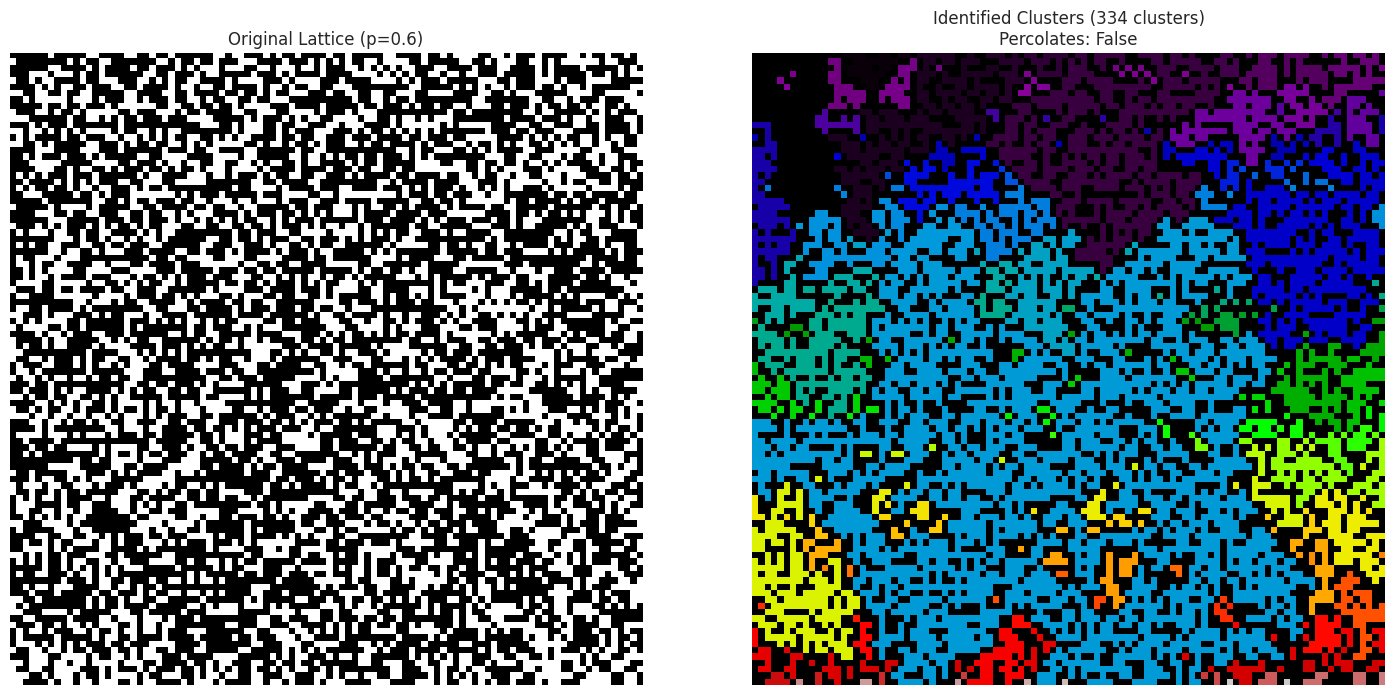

In [5]:
def identify_clusters(lattice):
    """
    Identify connected clusters using scipy's label function.
    Uses 4-connectivity (orthogonal neighbors only).
    
    Parameters:
    -----------
    lattice : numpy array
        2D binary array representing occupied sites
    
    Returns:
    --------
    labeled_array : numpy array
        Array where each cluster has a unique integer label
    num_clusters : int
        Total number of clusters found
    """
    # Define 4-connectivity structure (no diagonals)
    structure = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]])
    
    labeled_array, num_clusters = ndimage.label(lattice, structure=structure)
    return labeled_array, num_clusters


def get_cluster_sizes(labeled_array, num_clusters):
    """
    Get the size of each cluster.
    
    Parameters:
    -----------
    labeled_array : numpy array
        Array with cluster labels
    num_clusters : int
        Number of clusters
    
    Returns:
    --------
    sizes : list
        List of cluster sizes
    """
    sizes = []
    for i in range(1, num_clusters + 1):
        size = np.sum(labeled_array == i)
        sizes.append(size)
    return sizes


def check_percolation(labeled_array, num_clusters):
    """
    Check if percolation occurs (spanning cluster exists).
    A cluster percolates if it connects opposite edges.
    
    Parameters:
    -----------
    labeled_array : numpy array
        Array with cluster labels
    num_clusters : int
        Number of clusters
    
    Returns:
    --------
    percolates : bool
        True if a spanning cluster exists
    spanning_cluster : int or None
        Label of the spanning cluster, or None
    """
    # Check horizontal percolation
    left_labels = set(labeled_array[:, 0]) - {0}
    right_labels = set(labeled_array[:, -1]) - {0}
    h_percolating = left_labels & right_labels
    
    # Check vertical percolation
    top_labels = set(labeled_array[0, :]) - {0}
    bottom_labels = set(labeled_array[-1, :]) - {0}
    v_percolating = top_labels & bottom_labels
    
    percolating_clusters = h_percolating | v_percolating
    
    if percolating_clusters:
        return True, list(percolating_clusters)[0]
    return False, None


# Example: Identify clusters
p = 0.6
lattice = create_lattice(100, p)
labeled, n_clusters = identify_clusters(lattice)
sizes = get_cluster_sizes(labeled, n_clusters)
percolates, spanning_label = check_percolation(labeled, n_clusters)

print(f"Occupation probability: {p}")
print(f"Number of clusters: {n_clusters}")
print(f"Largest cluster size: {max(sizes) if sizes else 0}")
print(f"Percolation occurs: {percolates}")

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Original lattice
axes[0].imshow(lattice, cmap='binary', interpolation='nearest')
axes[0].set_title(f'Original Lattice (p={p})')
axes[0].axis('off')

# Labeled clusters
im = axes[1].imshow(labeled, cmap='nipy_spectral', interpolation='nearest')
axes[1].set_title(f'Identified Clusters ({n_clusters} clusters)\nPercolates: {percolates}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 3. Percolation Threshold Analysis

Let's find the percolation threshold by simulating many lattices at different occupation probabilities.

Finding percolation threshold...
This may take a minute...

Scanning occupation probabilities...
p = 0.400: percolation probability = 0.000
p = 0.421: percolation probability = 0.000
p = 0.442: percolation probability = 0.000
p = 0.463: percolation probability = 0.000
p = 0.484: percolation probability = 0.000
p = 0.505: percolation probability = 0.000
p = 0.526: percolation probability = 0.020
p = 0.547: percolation probability = 0.100
p = 0.568: percolation probability = 0.360
p = 0.589: percolation probability = 0.580
p = 0.611: percolation probability = 0.860
p = 0.632: percolation probability = 1.000
p = 0.653: percolation probability = 1.000
p = 0.674: percolation probability = 1.000
p = 0.695: percolation probability = 1.000
p = 0.716: percolation probability = 1.000
p = 0.737: percolation probability = 1.000
p = 0.758: percolation probability = 1.000
p = 0.779: percolation probability = 1.000
p = 0.800: percolation probability = 1.000


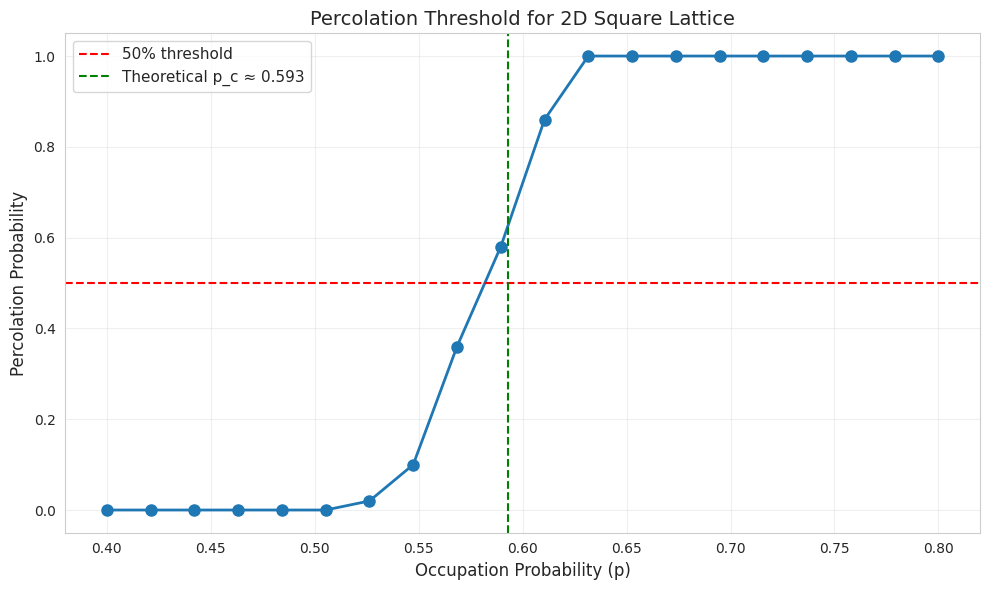


Empirical percolation threshold: p_c ≈ 0.589
Theoretical threshold: p_c ≈ 0.593
Difference: 0.004


In [6]:
def percolation_probability(size, p, n_samples=100):
    """
    Calculate the probability of percolation at a given occupation probability.
    
    Parameters:
    -----------
    size : int
        Lattice size
    p : float
        Occupation probability
    n_samples : int
        Number of realizations to average over
    
    Returns:
    --------
    prob : float
        Fraction of realizations that percolate
    """
    percolation_count = 0
    
    for _ in range(n_samples):
        lattice = create_lattice(size, p)
        labeled, n_clusters = identify_clusters(lattice)
        percolates, _ = check_percolation(labeled, n_clusters)
        if percolates:
            percolation_count += 1
    
    return percolation_count / n_samples


def find_percolation_threshold(size=50, n_samples=50):
    """
    Find the percolation threshold by scanning occupation probabilities.
    
    Parameters:
    -----------
    size : int
        Lattice size
    n_samples : int
        Number of realizations per probability
    
    Returns:
    --------
    probabilities : array
        Array of occupation probabilities tested
    percolation_probs : array
        Corresponding percolation probabilities
    """
    probabilities = np.linspace(0.4, 0.8, 20)
    percolation_probs = []
    
    print("Scanning occupation probabilities...")
    for p in probabilities:
        prob = percolation_probability(size, p, n_samples)
        percolation_probs.append(prob)
        print(f"p = {p:.3f}: percolation probability = {prob:.3f}")
    
    return probabilities, np.array(percolation_probs)


# Run threshold analysis
print("Finding percolation threshold...")
print("This may take a minute...\n")

probs, perc_probs = find_percolation_threshold(size=50, n_samples=50)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(probs, perc_probs, 'o-', linewidth=2, markersize=8)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% threshold')
plt.axvline(x=0.593, color='g', linestyle='--', label='Theoretical p_c ≈ 0.593')
plt.xlabel('Occupation Probability (p)', fontsize=12)
plt.ylabel('Percolation Probability', fontsize=12)
plt.title('Percolation Threshold for 2D Square Lattice', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Find empirical threshold (where percolation probability = 0.5)
idx = np.argmin(np.abs(perc_probs - 0.5))
empirical_threshold = probs[idx]
print(f"\nEmpirical percolation threshold: p_c ≈ {empirical_threshold:.3f}")
print(f"Theoretical threshold: p_c ≈ 0.593")
print(f"Difference: {abs(empirical_threshold - 0.593):.3f}")

## 4. Cluster Size Distribution

Near the percolation threshold, cluster sizes follow a power-law distribution - a hallmark of critical phenomena.

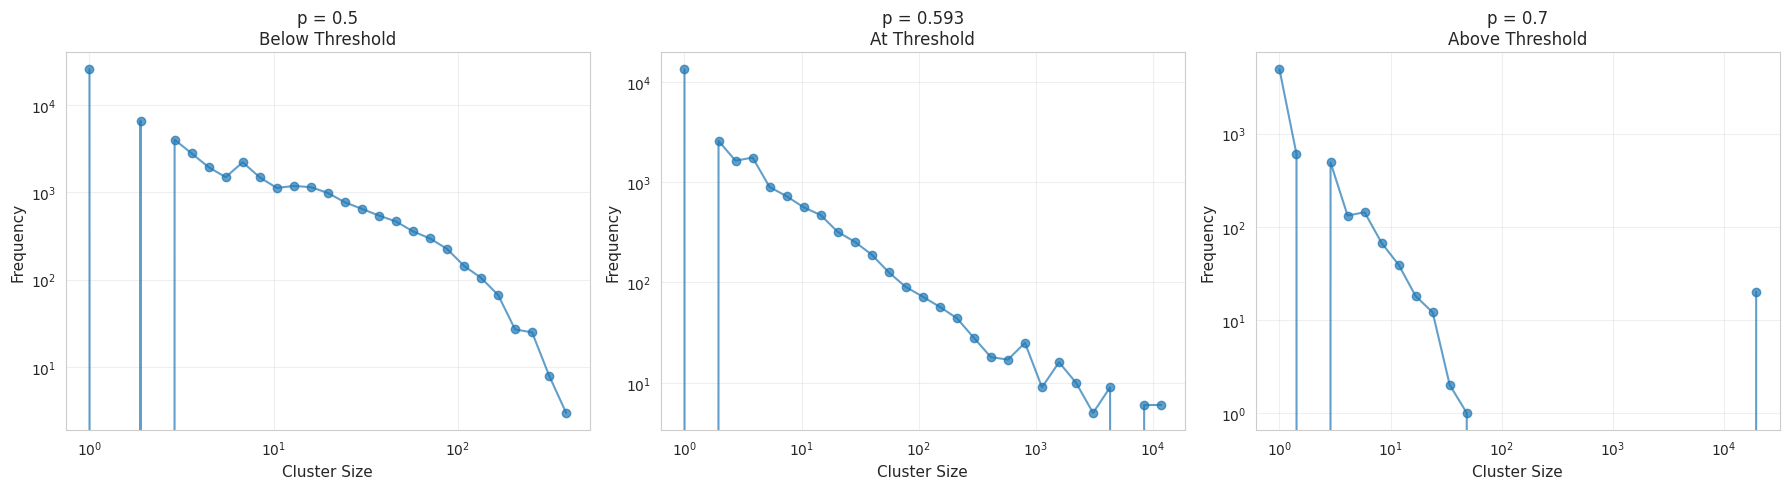

Note: At the critical point (p ≈ 0.593), the distribution shows power-law behavior
This indicates scale-free clustering - a key signature of critical phenomena


In [7]:
def analyze_cluster_distribution(size=200, p=0.593, n_samples=10):
    """
    Analyze cluster size distribution at a given occupation probability.
    
    Parameters:
    -----------
    size : int
        Lattice size
    p : float
        Occupation probability
    n_samples : int
        Number of realizations to average
    
    Returns:
    --------
    all_sizes : list
        All cluster sizes from all realizations
    """
    all_sizes = []
    
    for _ in range(n_samples):
        lattice = create_lattice(size, p)
        labeled, n_clusters = identify_clusters(lattice)
        sizes = get_cluster_sizes(labeled, n_clusters)
        all_sizes.extend(sizes)
    
    return all_sizes


# Analyze at different probabilities
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
probabilities = [0.5, 0.593, 0.7]  # Below, at, and above threshold

for ax, p in zip(axes, probabilities):
    sizes = analyze_cluster_distribution(size=200, p=p, n_samples=20)
    
    # Create histogram
    bins = np.logspace(0, np.log10(max(sizes)), 30)
    counts, edges = np.histogram(sizes, bins=bins)
    
    # Plot on log-log scale
    ax.loglog(edges[:-1], counts, 'o-', alpha=0.7)
    ax.set_xlabel('Cluster Size', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'p = {p}\n{"Below" if p < 0.593 else "At" if p == 0.593 else "Above"} Threshold', fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Note: At the critical point (p ≈ 0.593), the distribution shows power-law behavior")
print("This indicates scale-free clustering - a key signature of critical phenomena")

## 5. Urban Application: Service Coverage Analysis

Let's apply site percolation to a realistic urban scenario: analyzing service coverage.

### Scenario
Imagine a city wants to provide WiFi access points or public transit stops. What density of coverage is needed to ensure city-wide accessibility?

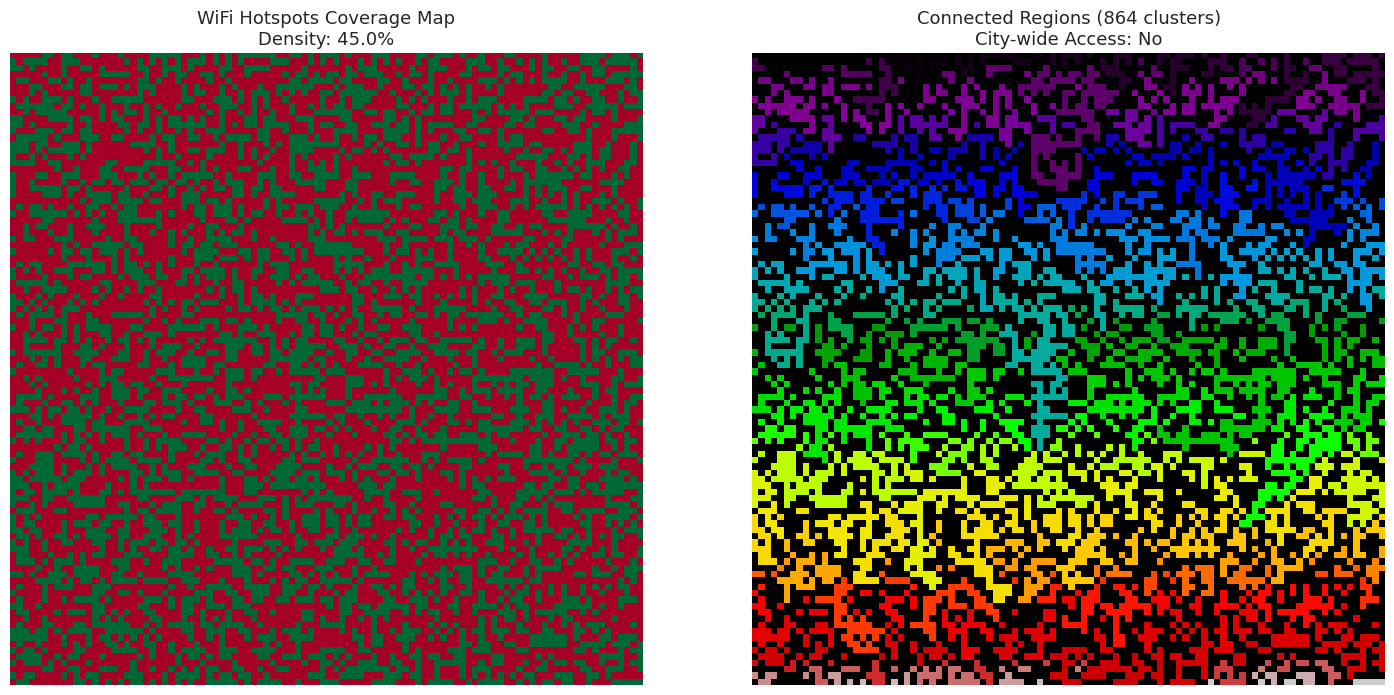


=== WiFi Hotspots Coverage Analysis ===
City size: 100 × 100 blocks
Coverage density: 45.0%
Covered blocks: 4477/10000
Number of separate coverage regions: 864
Largest connected region: 102 blocks (1.0% of city)
City-wide connectivity: ✗ NO - Coverage is fragmented

⚠ Recommendation: Increase coverage to at least 59.3% for city-wide connectivity


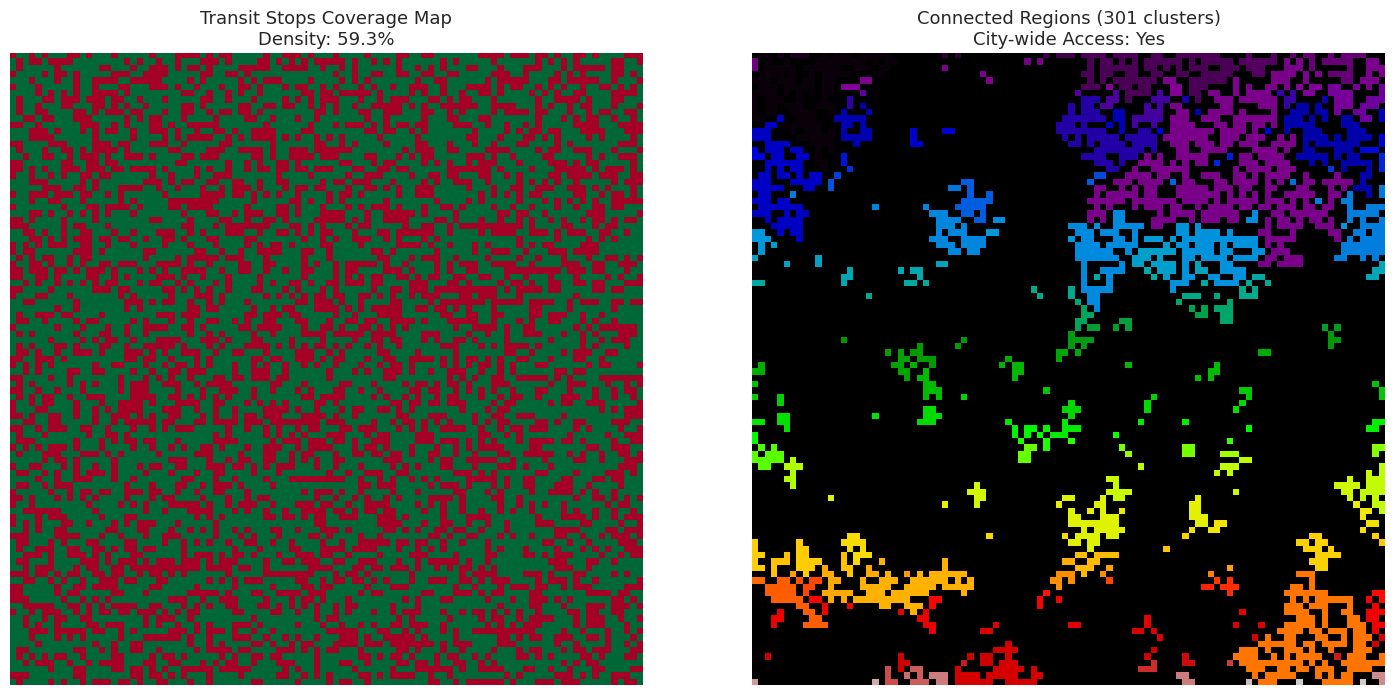


=== Transit Stops Coverage Analysis ===
City size: 100 × 100 blocks
Coverage density: 59.3%
Covered blocks: 5935/10000
Number of separate coverage regions: 301
Largest connected region: 3690 blocks (36.9% of city)
City-wide connectivity: ✓ YES - Service spans entire city

✓ Coverage is sufficient for city-wide accessibility


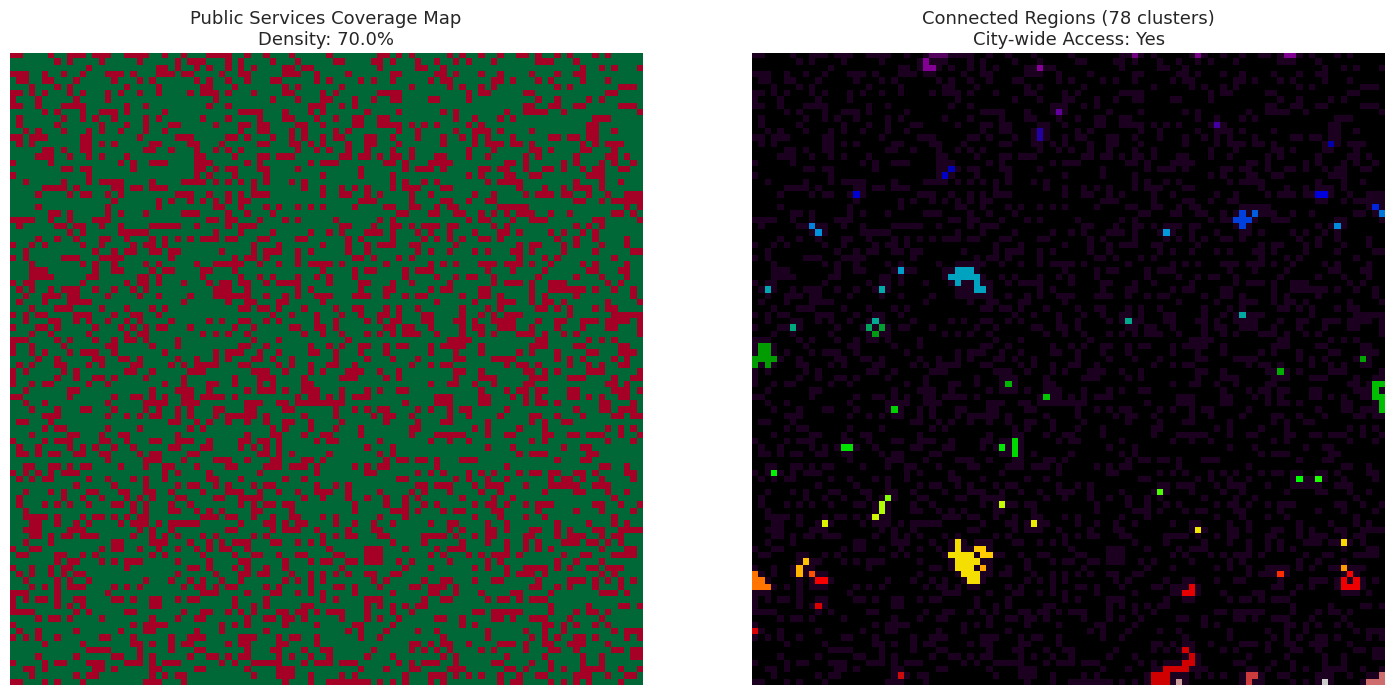


=== Public Services Coverage Analysis ===
City size: 100 × 100 blocks
Coverage density: 70.0%
Covered blocks: 7017/10000
Number of separate coverage regions: 78
Largest connected region: 6849 blocks (68.5% of city)
City-wide connectivity: ✓ YES - Service spans entire city

✓ Coverage is sufficient for city-wide accessibility


In [8]:
def simulate_service_coverage(city_size=100, coverage_density=0.6, service_name="WiFi"):
    """
    Simulate service coverage in a city grid.
    
    Parameters:
    -----------
    city_size : int
        Size of city grid (blocks)
    coverage_density : float
        Fraction of blocks with service access
    service_name : str
        Name of the service for display
    """
    # Create coverage map
    coverage = create_lattice(city_size, coverage_density)
    
    # Identify accessible regions
    labeled, n_clusters = identify_clusters(coverage)
    sizes = get_cluster_sizes(labeled, n_clusters)
    percolates, spanning = check_percolation(labeled, n_clusters)
    
    # Calculate statistics
    total_blocks = city_size ** 2
    covered_blocks = coverage.sum()
    largest_cluster = max(sizes) if sizes else 0
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Coverage map
    axes[0].imshow(coverage, cmap='RdYlGn', interpolation='nearest')
    axes[0].set_title(f'{service_name} Coverage Map\nDensity: {coverage_density:.1%}', fontsize=13)
    axes[0].axis('off')
    
    # Accessibility clusters
    # Highlight spanning cluster if it exists
    display_labeled = labeled.copy()
    if spanning:
        mask = labeled == spanning
        display_labeled = np.where(mask, -1, labeled)  # Mark spanning cluster specially
    
    axes[1].imshow(display_labeled, cmap='nipy_spectral', interpolation='nearest')
    axes[1].set_title(f'Connected Regions ({n_clusters} clusters)\nCity-wide Access: {"Yes" if percolates else "No"}', 
                     fontsize=13)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print(f"\n=== {service_name} Coverage Analysis ===")
    print(f"City size: {city_size} × {city_size} blocks")
    print(f"Coverage density: {coverage_density:.1%}")
    print(f"Covered blocks: {covered_blocks}/{total_blocks}")
    print(f"Number of separate coverage regions: {n_clusters}")
    print(f"Largest connected region: {largest_cluster} blocks ({100*largest_cluster/total_blocks:.1f}% of city)")
    print(f"City-wide connectivity: {'✓ YES - Service spans entire city' if percolates else '✗ NO - Coverage is fragmented'}")
    
    if not percolates and coverage_density < 0.593:
        print(f"\n⚠ Recommendation: Increase coverage to at least 59.3% for city-wide connectivity")
    elif percolates:
        print(f"\n✓ Coverage is sufficient for city-wide accessibility")


# Example 1: Low coverage (fragmented)
simulate_service_coverage(city_size=100, coverage_density=0.45, service_name="WiFi Hotspots")

# Example 2: Near threshold
simulate_service_coverage(city_size=100, coverage_density=0.593, service_name="Transit Stops")

# Example 3: High coverage (well-connected)
simulate_service_coverage(city_size=100, coverage_density=0.70, service_name="Public Services")

## 6. Interactive Exploration

Use this section to experiment with different parameters and visualize percolation behavior.

Creating 150×150 lattice with coverage density = 0.65


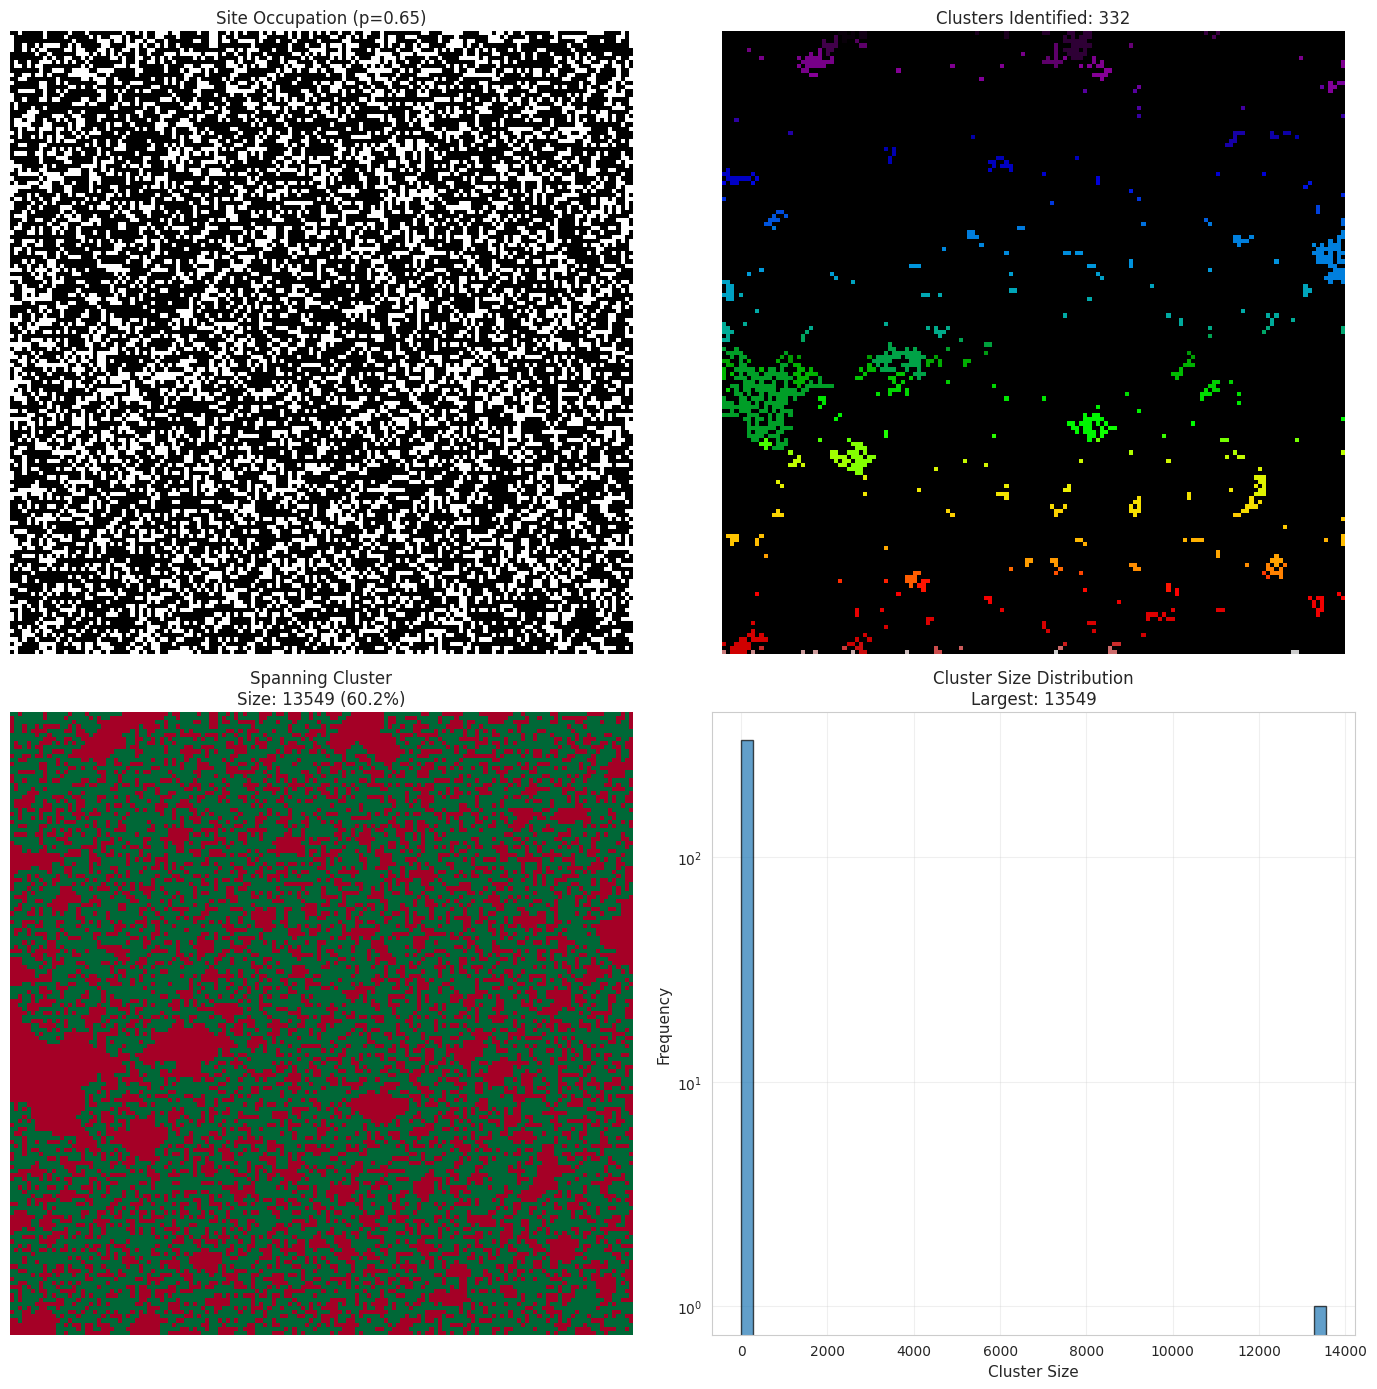


Percolation: YES
Number of clusters: 332
Largest cluster size: 13549


In [9]:
# Experiment with different parameters
CITY_SIZE = 150  # Size of the lattice
COVERAGE_DENSITY = 0.65  # Occupation probability (try values between 0.4 and 0.8)

print(f"Creating {CITY_SIZE}×{CITY_SIZE} lattice with coverage density = {COVERAGE_DENSITY}")

lattice = create_lattice(CITY_SIZE, COVERAGE_DENSITY)
labeled, n_clusters = identify_clusters(lattice)
sizes = get_cluster_sizes(labeled, n_clusters)
percolates, spanning = check_percolation(labeled, n_clusters)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# 1. Original lattice
axes[0, 0].imshow(lattice, cmap='binary', interpolation='nearest')
axes[0, 0].set_title(f'Site Occupation (p={COVERAGE_DENSITY})', fontsize=12)
axes[0, 0].axis('off')

# 2. Cluster identification
axes[0, 1].imshow(labeled, cmap='nipy_spectral', interpolation='nearest')
axes[0, 1].set_title(f'Clusters Identified: {n_clusters}', fontsize=12)
axes[0, 1].axis('off')

# 3. Spanning cluster (if exists)
if spanning:
    spanning_mask = labeled == spanning
    axes[1, 0].imshow(spanning_mask, cmap='RdYlGn', interpolation='nearest')
    axes[1, 0].set_title(f'Spanning Cluster\nSize: {sizes[spanning-1]} ({100*sizes[spanning-1]/CITY_SIZE**2:.1f}%)', 
                        fontsize=12)
else:
    axes[1, 0].text(0.5, 0.5, 'No Spanning\nCluster', 
                   ha='center', va='center', fontsize=20, transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Spanning Cluster', fontsize=12)
axes[1, 0].axis('off')

# 4. Cluster size distribution
if sizes:
    axes[1, 1].hist(sizes, bins=50, edgecolor='black', alpha=0.7)
    axes[1, 1].set_xlabel('Cluster Size', fontsize=11)
    axes[1, 1].set_ylabel('Frequency', fontsize=11)
    axes[1, 1].set_title(f'Cluster Size Distribution\nLargest: {max(sizes)}', fontsize=12)
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPercolation: {'YES' if percolates else 'NO'}")
print(f"Number of clusters: {n_clusters}")
print(f"Largest cluster size: {max(sizes) if sizes else 0}")

## Key Takeaways

1. **Percolation Threshold**: For a 2D square lattice, p_c ≈ 0.593 is the critical density where spanning clusters emerge

2. **Phase Transition**: Percolation exhibits a sharp transition from disconnected to connected states

3. **Urban Planning Implications**:
   - Service coverage below ~59% leads to fragmented access
   - Above this threshold, city-wide connectivity emerges
   - This applies to: transit networks, green spaces, facility placement, etc.

4. **Scale-Free Clustering**: At criticality, cluster sizes follow power-law distributions

5. **Universality**: The percolation threshold depends on lattice geometry, but the critical behavior is universal

## Further Exploration

- Try different lattice geometries (hexagonal, triangular)
- Implement bond percolation (connections vs. sites)
- Add spatial heterogeneity (varying occupation probabilities)
- Apply to real urban data (building density, green space, etc.)
- Study hierarchical percolation for multi-scale urban systems